# Preprocesado [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mariaprojas/AI-Project/blob/master/02%20-%20preprocesado.ipynb)

### Importando las librerias necesarias

In [46]:
#Importando librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import find_peaks

### Importando el archivo del dataset desde Google Drive

In [47]:
!pip install gdown

import gdown

# Define ID 
archivo_id = "1tQl5NDSp6TPxqDiUe342dYhC1j8yRg-v"

# Asigna nombre para el archivo en Colab
d1 = "dataset_1.csv"

# Construye el enlace de descarga del archivo
enlace_descarga = "https://drive.google.com/uc?id=" + archivo_id

# Descarga el archivo desde el enlace de descarga y lo guarda en Colab
gdown.download(enlace_descarga, d1, quiet=False)

# Lee el archivo y lo almacena en un data frame
d = pd.read_csv("dataset_1.csv") 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1tQl5NDSp6TPxqDiUe342dYhC1j8yRg-v
To: /content/dataset_1.csv
100%|██████████| 286M/286M [00:01<00:00, 198MB/s]
<ipython-input-47-9799088c9063>:18: DtypeWarning: Columns (28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("dataset_1.csv")


###Depuración por condiciones 

#### 1. No había información sobre el contenido de la columna




Marcadas en el apartado "Data" de la competencia de Kaggle como NA (Columna no disponible o autodocumentada)

In [48]:
d = d.drop(['RtpStateBitfield','IsSxsPassiveMode', 'AVProductsInstalled','AVProductsEnabled','IeVerIdentifier','Census_OEMNameIdentifier','Census_OEMModelIdentifier','Census_ProcessorManufacturerIdentifier','Census_ProcessorModelIdentifier','Census_InternalBatteryType','Census_InternalBatteryNumberOfCharges','Census_OSInstallLanguageIdentifier','Census_OSUILocaleIdentifier','Census_IsFlightingInternal', 'Census_ThresholdOptIn','Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier','Census_IsWIMBootEnabled','Wdft_RegionIdentifier'], axis=1)

#### 2. Cantidad de datos faltantes en la columna es mayor al 80%.

In [49]:
k = d.isna().sum()
k1 = k[k!=0]
k1

DefaultBrowsersIdentifier                            475931
AVProductStatesIdentifier                              2027
CityIdentifier                                        18085
OrganizationIdentifier                               153975
GeoNameIdentifier                                        17
OsBuildLab                                                1
IsProtected                                            2018
PuaMode                                              499864
SMode                                                 29972
SmartScreen                                          177277
Firewall                                               5234
UacLuaenable                                            612
Census_MDC2FormFactor                                    10
Census_DeviceFamily                                      10
Census_ProcessorCoreCount                              2279
Census_ProcessorClass                                497955
Census_PrimaryDiskTotalCapacity         

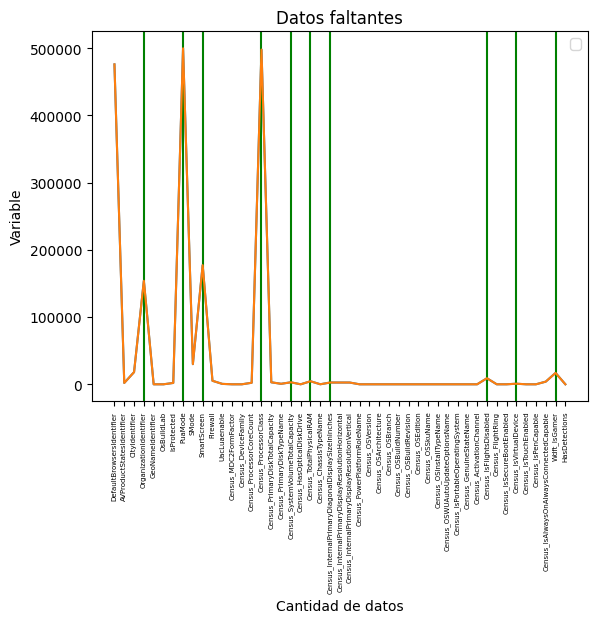

In [50]:
fig, ax = plt.subplots()
ax.plot(k1)
plt.xticks(rotation=90)
plt.xticks(fontsize=5)

picos, _ = find_peaks(k1) 

# Añadir líneas verticales en los picos
for p in picos:
    ax.axvline(x=p, color='g')

# Configurar los ejes y las etiquetas
plt.xlabel('Cantidad de datos')
plt.ylabel('Variable')
plt.title('Datos faltantes')
plt.legend()


plt.plot(k1)


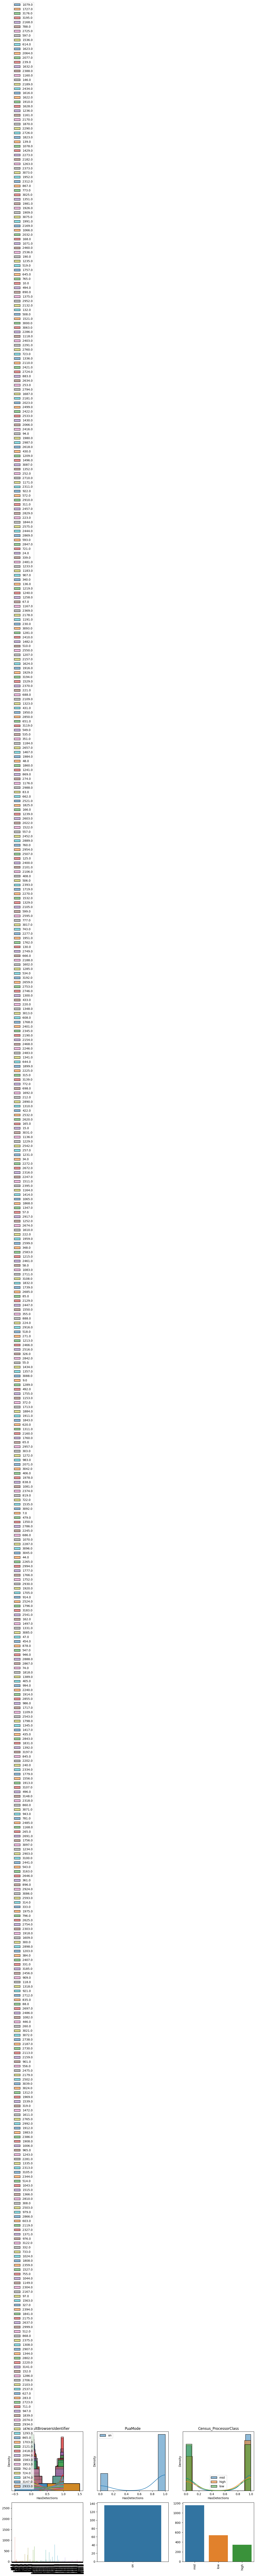

In [52]:
plt.figure(figsize=(20,8))
for i,c in enumerate(['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass']):    
    plt.subplot(2,4,i+1)
    k=d[[c,"HasDetections"]].dropna()
    for v in k[c].unique():
        sns.histplot(k.loc[k[c] == v, "HasDetections"], label=v, kde=True, stat="density")
        plt.title(c)
    plt.yticks([])
    plt.legend()

    plt.subplot(2, 4, i+5)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation=90,fontsize=10)

Se elimina la columna PuaMode debido a que el porcentaje de datos faltantes supera el 97% y su distribución con relación a la variable objetivo no se considera relevante. De forma similar ocurre en las otras dos columnas.

In [31]:
d = d.drop(['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass'],axis=1)

#### 3. Columnas que contienen un único valor para todas las filas.

In [32]:
d.columns[d.nunique() == 1]

Index([], dtype='object')

#### 4. Columnas repetidas o con información similar a otras.

<ipython-input-33-e8f5c3655a44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = d.corr()


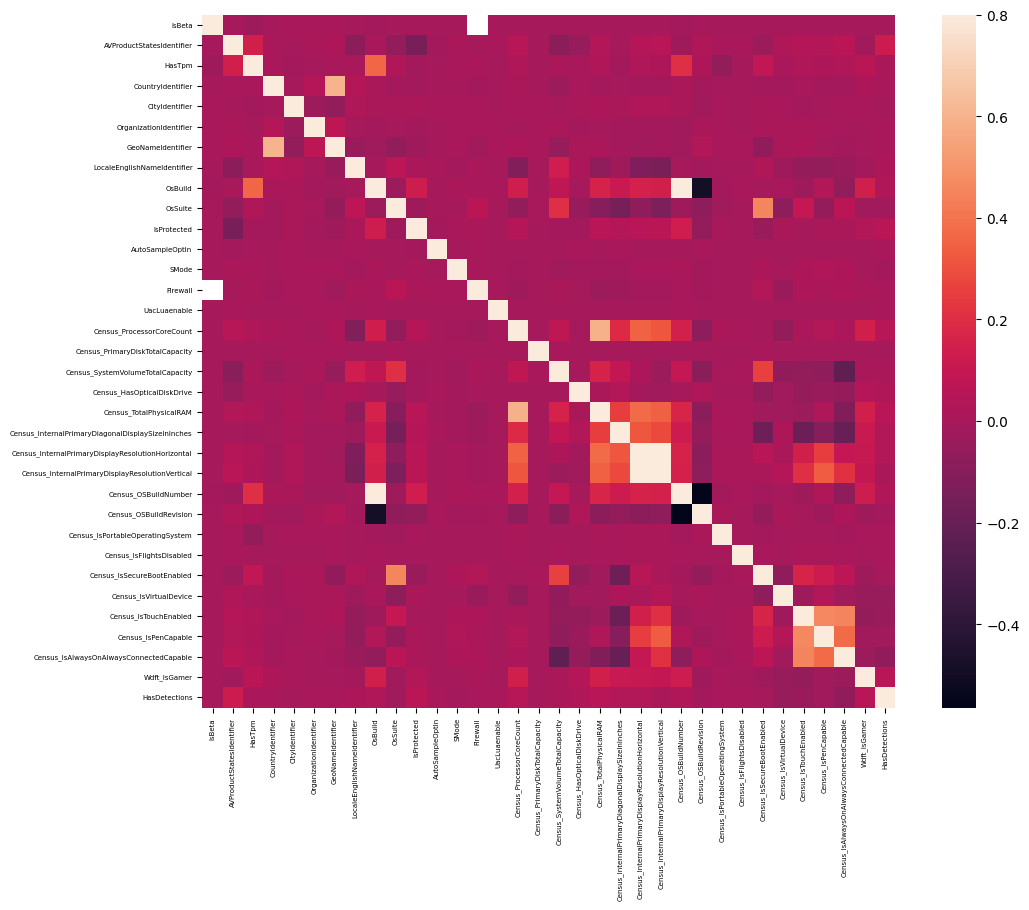

In [33]:
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
sns.heatmap(corrmat, vmax=.8, square=True);

Se observa que OSBuild y CensusOSBuildNumber tiene información similar.

In [34]:
d = d.drop(['Census_OSBuildNumber', 'Census_OSBuildRevision'],axis=1)

###5. Columnas con información irrelevante

In [35]:
d = d.drop('MachineIdentifier', axis=1)

In [36]:
print(d.shape)

(500000, 58)


Para mantener los parametros requeridos por el ejercicio academico generamos 4% más de datos faltantes

In [37]:
k = d.isna().sum()
k1 = k[k!=0]
k1.sum()

441636

In [38]:
# Fracción de elementos para eliminar 
frac = 0.04
num_elementos_a_eliminar = int(frac * d.size)

# Generar índices aleatorios de los elementos a eliminar
indices_a_eliminar = np.random.choice(d.size, num_elementos_a_eliminar, replace=False)

# Convertir los índices a coordenadas de filas y columnas en el DataFrame
filas = indices_a_eliminar // d.shape[1]
columnas = indices_a_eliminar % d.shape[1]

# Establecer los elementos seleccionados en NaN o en otro valor específico
for fila, columna in zip(filas, columnas):
    d.at[d.index[fila], d.columns[columna]] = np.nan

In [39]:
k = d.isna().sum()
k1 = k[k!=0]
k1.sum()

1584139

# Reparación de datos faltantes

##Variables categoricas

In [40]:
# reemplaza los valores faltantes con la moda en cada columna para las columnas que contienen variables categoricas
for col in d.select_dtypes(include=['object', 'category']).columns:
    mode = d[col].value_counts().index[0]
    d[col].fillna(mode, inplace=True)

In [41]:
for col in d.select_dtypes(include=['object', 'category']).columns:
    # Codificación One-Hot de la columna en cada dataframe
    ohd = pd.get_dummies(d[col], prefix=col, sparse=True)
    # Seleccionar solo las columnas con valores no nulos en ohd
    ohd = ohd.loc[:, (ohd != 0).any(axis=0)]
    # Eliminar la columna original del dataframe
    d = d.drop(col, axis=1)
    # Concatenar ohd al dataframe original
    d = pd.concat([d, ohd], axis=1)
d.head()

,IsBeta,AVProductStatesIdentifier,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,...,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Canary,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_OSG,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
0,NaN,46669.0,1.0,166.0,46055.0,27.0,200.0,230.0,16299.0,768.0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,NaN,1.0,162.0,130437.0,27.0,206.0,232.0,10586.0,NaN,...,0,0,0,0,0,0,1,0,0,0
2,0.0,51954.0,1.0,44.0,NaN,27.0,57.0,218.0,15063.0,768.0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,43927.0,1.0,155.0,82373.0,18.0,201.0,231.0,16299.0,768.0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,51954.0,1.0,41.0,32616.0,27.0,52.0,217.0,17134.0,256.0,...,0,0,0,0,0,0,1,0,0,0


##Variables numericas

In [42]:
# reemplaza los valores faltantes con la media en cada columna para las columnas que contienen variables numericas
for col in d.select_dtypes(include=np.number).columns:
    col_mean = d[col].mean()
    d[col] = d[col].fillna(col_mean)

###Adicionales

In [43]:
col_b = d['HasDetections']
column_names = list(d.columns)
column_names.remove('HasDetections')
column_names.append('HasDetections')
d = d.reindex(columns=column_names)